# Exercise 18

## Analyze class homeworks


In [213]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import r2_score, roc_auc_score

%matplotlib inline
import matplotlib.pyplot as plt


data = pd.read_excel('C:\\Users\\USER\\Documents\\Maestria\\05. Semestre II\\01. Mineria\\190408\\E18.xlsx')

data.head()

,Sexo,T1,T2,T3,T4,T5,T6
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...


# Exercise 18.1

Analyze the writing patterns of each student

In [214]:
# Palabras que nadie mas use por ejemplo, Frecuencias de palabras, TOP Más usadas, 
# Generar cluster, con el texto unido de todas las tareas, Reducir el vector de salida para graficarlo
# No se debe hacer SMOOT, porque no aporta nada
# Usar Stopwords
# podria discriminar entre hombres y mujeres, calcular # adjetivos, total palabras, cantidad de puntos,signos de puntuación,
# tíldes. 
# Podría hacer balanceo con mucho cuidado

data['X'] = data['T1'] + data['T2'] + data['T3'] + data['T4'] + data['T5'] + data['T6']  
data.head()

,Sexo,T1,T2,T3,T4,T5,T6,X
0,H,Un científico de datos y un ingeniero de datos...,NaN,Los árboles de decisión es uno de los algoritm...,NaN,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,NaN
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,NaN,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,NaN
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,Python vs Stata. Analizar información es un pr...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,NaN,NaN
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,Python vs R para análisis de datos. A pesar de...


In [215]:
data=data.fillna(' ', inplace=False)

In [216]:
data['X'] = data['T1'] +' '+ data['T2'] +' '+ data['T3'] +' '+ data['T4'] +' '+ data['T5'] +' '+ data['T6']  
data.head()

,Sexo,T1,T2,T3,T4,T5,T6,X
0,H,Un científico de datos y un ingeniero de datos...,,Los árboles de decisión es uno de los algoritm...,,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,Un científico de datos y un ingeniero de datos...
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,Aunque los dos perfiles cuentan con habilidade...
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,Python vs Stata. Analizar información es un pr...
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,,Los algoritmos de machine learning buscan pred...
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,Python vs R para análisis de datos. A pesar de...


In [217]:
import nltk
#nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=False)

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
vect = StemmedTfidfVectorizer()
X_dtm = vect.fit_transform(data['X'])
X_dtm.shape

(42, 4989)

In [218]:
vect

StemmedTfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
            dtype=<type 'numpy.float64'>, encoding=u'utf-8',
            input=u'content', lowercase=True, max_df=1.0,
            max_features=None, min_df=1, ngram_range=(1, 1), norm=u'l2',
            preprocessor=None, smooth_idf=True, stop_words=None,
            strip_accents=None, sublinear_tf=False,
            token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None,
            use_idf=True, vocabulary=None)

In [219]:
print(vect.vocabulary_) # Imprime vocabulario

{u'consensuado': 1058, u'excluyen': 2065, u'krajewski': 2777, u'trat\xe1ndos': 4724, u'otro': 3363, u'seg\xfan': 4267, u'accur': 98, u'asignara': 455, u'pido': 3524, u'determinando': 1512, u'otra': 3362, u'igual': 2485, u'regresi\xf3n': 4047, u'segmento': 4259, u'participaci\xf3n': 3432, u'generars': 2311, u'predicen': 3645, u'dela': 1362, u'especificacion': 1933, u'fuent': 2242, u'supervisada': 4519, u'compuesta': 965, u'compuesto': 966, u'supervisado': 4520, u'haber': 2371, u'necesariament': 3179, u'vector': 4865, u'elegir': 1722, u'probabil\xedstico': 3720, u'markov': 2958, u'correctament': 1174, u'basico': 568, u'dise\xf1ar': 1593, u'fuera': 2243, u'concisa': 989, u'phyton': 3522, u'agrega': 203, u'ejemplo': 1708, u'capacitaci\xf3n': 707, u'elegant': 1719, u'repercutiendo': 4077, u'entr': 1849, u'aggreg': 200, u'yace': 4965, u'fuert': 2246, u'embolsadoen': 1739, u'tecnol\xf3gica': 4581, u'importaci\xf3n': 2517, u'inclimo': 2537, u'tipo': 4657, u'generar\xe1': 2312, u'realizaran': 3

In [220]:
# Largo textos
data['Longitud'] = data['X'].apply(len)
data.head()

,Sexo,T1,T2,T3,T4,T5,T6,X,Longitud
0,H,Un científico de datos y un ingeniero de datos...,,Los árboles de decisión es uno de los algoritm...,,"En el documento ""Do We Need Hundreds of Classi...",Boosting builds models from individual so call...,Un científico de datos y un ingeniero de datos...,11581
1,H,Aunque los dos perfiles cuentan con habilidade...,Aunque el conceso no es total en el tema de ma...,,En Machine Learing el propósito de los métodos...,El paper publicado en 2014 hace una evaluación...,Gradient Boosting ClassifierGradient Boosting ...,Aunque los dos perfiles cuentan con habilidade...,8519
2,H,Python vs Stata. Analizar información es un pr...,En el marco del Machine Learning encontramos c...,Árbol de clasificación Como su nombre lo indic...,Este es un mecanismo que utiliza varios algori...,El paper analiza 179 clasificadores de 17 dife...,Gradient Boosting Classifier busca aprender de...,Python vs Stata. Analizar información es un pr...,11107
3,M,Los algoritmos de machine learning buscan pred...,Los algoritmos de machine learning buscan pred...,Los arboles de decisión pertenecen a los algor...,Consideremos el siguiente ejemplo: Una persona...,¿Se necesitan cientos de modelos para resolver...,,Los algoritmos de machine learning buscan pred...,9592
4,H,Python vs R para análisis de datos. A pesar de...,Tipos de aprendizaje en Machine Learning. El M...,Tipos de árboles de decisión y aplicaciones. U...,La combinación de modelos o ensemble es un mod...,En el articulo se analizan cerca de 180 clasif...,XGBoosting vs GBoosting. A pesar de que el alg...,Python vs R para análisis de datos. A pesar de...,10246


In [221]:
# Frecuencia palabras
dataFrec=pd.DataFrame.from_dict(vect.vocabulary_, orient='index',columns=['Frecuencia'])
dataFrec.sort_values(by='Frecuencia', ascending=False)

,Frecuencia
útile,4988
útil,4987
único,4986
únicament,4985
única,4984
último,4983
última,4982
óptimo,4981
óptima,4980
ítem,4979


In [222]:
# Estadísticas de Longitud textos x Género
data.groupby('Sexo').describe()

Longitud                                                                \
        count          mean          std     min      25%     50%       75%   
Sexo                                                                          
H        34.0   9802.470588  3780.833524  1441.0  7948.75  9199.5  11572.75   
M         8.0  10162.125000  2248.111299  6707.0  8923.25  9484.0  12007.50   

               
          max  
Sexo           
H     22083.0  
M     13319.0

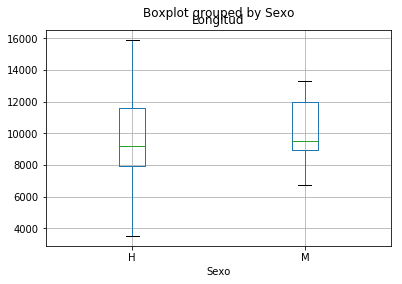

In [223]:
data.boxplot( column = 'Longitud' , by = 'Sexo',showfliers=False) # Sin atípicos

En promedio las mujeres escribieron textos más largos que los hombres, sin embargo no hay diferencias estadísticamente significativas por género.
El top 5 de las palabras más usadas fueron las que tiene raíz: útil, único, último, óptimo, ítem.

# Exercise 18.2

Evaluate the similarities of the homeworks of the students

tip: https://github.com/orsinium/textdistance

In [224]:
# Levenstein no corre, usar otra
# Con la segmentación del punto anterior, calcular la distancia entre centroides, donde cada punto representa un usuario (distancia entre usuarios)
# Pinto a cada usuario y calculo distancia entre usuarios, con ngrams, sin ngrams, o buscar como
import textdistance
hamming = textdistance.Hamming(external=False)
hamming('text', 'testit')
distancias = np.zeros((X.shape[0],X.shape[0]))
for j in range(len(X)):
    for i in range(len(X)):
        distancias[i,j] = textdistance.hamming.distance(X.iloc[i], X.iloc[j])

In [225]:
distancias

array([[    0., 11024., 10768., ..., 12505., 10919., 10976.],
       [11024.,     0., 10464., ..., 12699.,  8812.,  7880.],
       [10768., 10464.,     0., ..., 12491., 10446., 10487.],
       ...,
       [12505., 12699., 12491., ...,     0., 12611., 12732.],
       [10919.,  8812., 10446., ..., 12611.,     0.,  8755.],
       [10976.,  7880., 10487., ..., 12732.,  8755.,     0.]])

In [226]:
print (type(distancias), distancias.shape)


(<type 'numpy.ndarray'>, (42L, 42L))


# Exercise 18.3

Create a classifier to predict the sex of each student



In [227]:
# Contar signos de puntuación podría funcionar
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("spanish", ignore_stopwords=False)

class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
vect = StemmedTfidfVectorizer()
X_dtm = vect.fit_transform(data['X'])

In [228]:
X_dtm.shape

(42, 3290)

In [229]:
y = data['Sexo'].map({'H':1,'M':0})

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.25, random_state=15)

In [231]:
from sklearn.linear_model import LogisticRegression
LogReg_Model = LogisticRegression()
LogReg_Model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [232]:
y_pred = LogReg_Model.predict(X_test)
y_pred # Error - Todos hombres

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [233]:
from sklearn import metrics
print(roc_auc_score(y_test,y_pred))

0.5
